In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Zadanie 
Sprawdź czy wzrost zębów zależy od pozostałych zmiennych <tt>supp</tt>, <tt>dose</tt>? 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tooth_growth_csv')
df = data
df.head()
#df.supp.unique()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [3]:
# Bring them in DataFrame-format
df = pd.DataFrame(data, columns=['len', 'supp', 'dose'])        
# Determine the ANOVA with interaction
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
lm = ols(formula, df).fit()
anovaResults = anova_lm(lm)
print(anovaResults)

                   df       sum_sq      mean_sq          F        PR(>F)
C(supp)           1.0   205.350000   205.350000  15.571979  2.311828e-04
C(dose)           2.0  2426.434333  1213.217167  91.999965  4.046291e-18
C(supp):C(dose)   2.0   108.319000    54.159500   4.106991  2.186027e-02
Residual         54.0   712.106000    13.187148        NaN           NaN


In [5]:
# supp i dose różnicują para supp+dose również, czyli wszystkie różnicują bo p-value malutkie

In [4]:
formula = 'len ~ C(supp)*C(dose)'   # taki zapis ozn to samo co wyżej
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN


In [5]:
df.dose.unique()

array([0.5, 1. , 2. ])

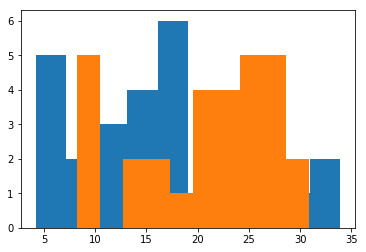

In [7]:
data1=df.len[df.supp=='VC']
data2=df.len[df.supp=='OJ']
(W,p) = stats.levene(data1, data2)
p
import matplotlib
import matplotlib.pyplot as plt
plt.hist(data1)
plt.hist(data2)
plt.show()

In [8]:
data1=df.len[df.dose==0.5]
data2=df.len[df.dose==1.]
data3=df.len[df.dose==2.]
(W,p) = stats.levene(data1, data2, data3)
p

0.5280694573759905

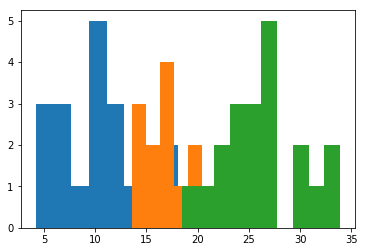

In [9]:
plt.hist(data1)
plt.hist(data2)
plt.hist(data3)
plt.show()

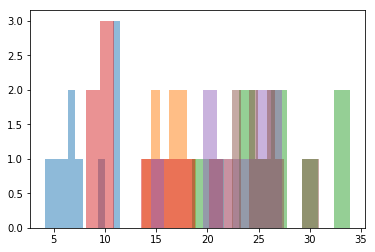

In [10]:
data1=df.len[(df.dose==0.5) & (df.supp=='VC')]
data2=df.len[(df.dose==1.) & (df.supp=='VC')]
data3=df.len[(df.dose==2.) & (df.supp=='VC')]
data4=df.len[(df.dose==0.5) & (df.supp=='OJ')]
data5=df.len[(df.dose==1.) & (df.supp=='OJ')]
data6=df.len[(df.dose==2.) & (df.supp=='OJ')]


plt.hist(data1, alpha=0.5)
plt.hist(data2, alpha=0.5)
plt.hist(data3, alpha=0.5)
plt.hist(data4, alpha=0.5)
plt.hist(data5, alpha=0.5)
plt.hist(data6, alpha=0.5)
plt.show()